In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('Industry.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   mdate   1014 non-null   datetime64[ns]
 1   Rf      1014 non-null   object        
 2   MktRf   1014 non-null   object        
 3   Food    1014 non-null   float64       
 4   Beer    1014 non-null   float64       
 5   Smoke   1014 non-null   float64       
 6   Games   1014 non-null   float64       
 7   Books   1014 non-null   float64       
 8   Hshld   1014 non-null   float64       
 9   Clths   1014 non-null   float64       
 10  Hlth    1014 non-null   float64       
 11  Chems   1014 non-null   float64       
 12  Txtls   1014 non-null   float64       
 13  Cnstr   1014 non-null   float64       
 14  Steel   1014 non-null   float64       
 15  FabPr   1014 non-null   float64       
 16  ElcEq   1014 non-null   float64       
 17  Autos   1014 non-null   float64       
 18  Carry   

In [ ]:
df.shape

(1014, 33)

In [ ]:
df.head()

,mdate,Rf,MktRf,Food,Beer,Smoke,Games,Books,Hshld,Clths,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
0,192607,0.22%,2.62%,0.53%,-5.19%,1.29%,2.30%,10.97%,-0.50%,8.08%,...,0.83%,9.22%,2.06%,7.66%,1.91%,-23.79%,-2.94%,1.83%,0.16%,5.20%
1,192608,0.25%,2.56%,2.71%,27.03%,6.53%,0.54%,10.01%,-3.58%,-2.51%,...,2.17%,2.02%,4.40%,-2.37%,4.87%,5.39%,-0.56%,-0.09%,4.38%,6.76%
2,192609,0.23%,0.36%,1.29%,4.02%,1.22%,5.92%,-0.99%,0.71%,-0.51%,...,2.41%,2.25%,0.18%,-5.55%,0.06%,-7.87%,0.17%,-0.58%,-1.36%,-3.86%
3,192610,0.32%,-3.43%,-3.13%,-3.31%,1.07%,-4.41%,9.47%,-4.66%,0.12%,...,-0.11%,-2.00%,-1.08%,-5.03%,-2.65%,-15.38%,-5.34%,-4.13%,-5.09%,-8.49%
4,192611,0.31%,2.44%,6.28%,7.29%,4.41%,2.60%,-5.80%,-0.51%,1.87%,...,1.63%,3.77%,3.64%,3.81%,1.59%,4.67%,4.04%,4.32%,2.29%,4.00%


## 1.1: Exploration

Starting in 1927/07, for each industry and each month, compute the (arithmetic) average re
turn over the previous 12 month for that industry (not including the month itself). Then for
each month, rank the industries based on their past average return (hint: Excel has a function
called “RANK(cell,range,1)”). Compute each industry’s average rank (1=lowest past average
return, etc.).

In [ ]:
df['mdate'] = pd.to_datetime(df['mdate'].astype(str), format='%Y%m')
df = df[df['mdate'] >= pd.to_datetime('1926-07-01')]

#industry related columns
industry_cols = [col for col in df.columns if col not in ['mdate', 'Rf', 'MktRf']]

#convert % to float
df[industry_cols] = df[industry_cols].replace('%', '', regex=True).astype(float) / 100

In [ ]:
results = pd.DataFrame()
results['mdate'] = df['mdate']

for industry in industry_cols:
    # calculate 12-month average (excluding current month)
    results[f'{industry}_12m_avg'] = df[industry].shift(1).rolling(
        window=12, min_periods=12
    ).mean()

start_date = pd.to_datetime('1927-07-01')
results = results[results['mdate'] >= start_date]

In [ ]:
avg_cols = [col for col in results.columns if col.endswith('_12m_avg')]

# Rank industries for each month (1 = lowest return)
monthly_ranks = pd.DataFrame(index=results.index)
monthly_ranks['mdate'] = results['mdate']

for date in results['mdate'].unique():
    date_mask = results['mdate'] == date
    monthly_data = results.loc[date_mask, avg_cols]
    monthly_ranks.loc[date_mask, avg_cols] = monthly_data.rank(axis=1, ascending=True)

ranked_df = monthly_ranks.copy()

# To check the structure
print("Shape of ranked_df:", ranked_df.shape)
print("\nColumns in ranked_df:", ranked_df.columns.tolist())
print("\nFirst few rows of ranked_df:")
print(ranked_df.head())

Shape of ranked_df: (1002, 31)

Columns in ranked_df: ['mdate', 'Food_12m_avg', 'Beer_12m_avg', 'Smoke_12m_avg', 'Games_12m_avg', 'Books_12m_avg', 'Hshld_12m_avg', 'Clths_12m_avg', 'Hlth_12m_avg', 'Chems_12m_avg', 'Txtls_12m_avg', 'Cnstr_12m_avg', 'Steel_12m_avg', 'FabPr_12m_avg', 'ElcEq_12m_avg', 'Autos_12m_avg', 'Carry_12m_avg', 'Mines_12m_avg', 'Coal_12m_avg', 'Oil_12m_avg', 'Util_12m_avg', 'Telcm_12m_avg', 'Servs_12m_avg', 'BusEq_12m_avg', 'Paper_12m_avg', 'Trans_12m_avg', 'Whlsl_12m_avg', 'Rtail_12m_avg', 'Meals_12m_avg', 'Fin_12m_avg', 'Other_12m_avg']

First few rows of ranked_df:
        mdate  Food_12m_avg  Beer_12m_avg  Smoke_12m_avg  Games_12m_avg  \
12 1927-07-01          14.0          30.0           24.0            3.0   
13 1927-08-01          15.0          30.0           27.0            3.0   
14 1927-09-01          14.0          17.0           26.0            4.0   
15 1927-10-01          13.0          17.0           27.0            3.0   
16 1927-11-01          13.0   

In [ ]:
# average rank for each industry
avg_ranks = {}
for col in avg_cols:
    industry_name = col.replace('_12m_avg', '')
    avg_ranks[industry_name] = monthly_ranks[col].mean()

# sort results
sorted_ranks = pd.DataFrame.from_dict(avg_ranks, orient='index', columns=['avg_rank'])
sorted_ranks = sorted_ranks.sort_values('avg_rank')
print("\nAverage ranks by industry (1 = lowest return):")
print(sorted_ranks)


Average ranks by industry (1 = lowest return):
        avg_rank
Telcm  14.088323
Other  14.216068
Clths  14.540918
Util   14.767465
Whlsl  14.773453
Steel  14.890220
Cnstr  14.908184
Hshld  14.943114
Mines  14.957086
Books  14.974052
Trans  14.999002
Food   15.183633
Txtls  15.238523
Rtail  15.381737
Chems  15.488024
Paper  15.507984
Hlth   15.657186
FabPr  15.761477
Fin    15.802395
Oil    15.910679
Meals  15.951098
Coal   16.004990
Autos  16.013473
BusEq  16.093812
Smoke  16.216567
Games  16.247505
Beer   16.386228
Servs  16.410679
Carry  16.518463
ElcEq  17.167665


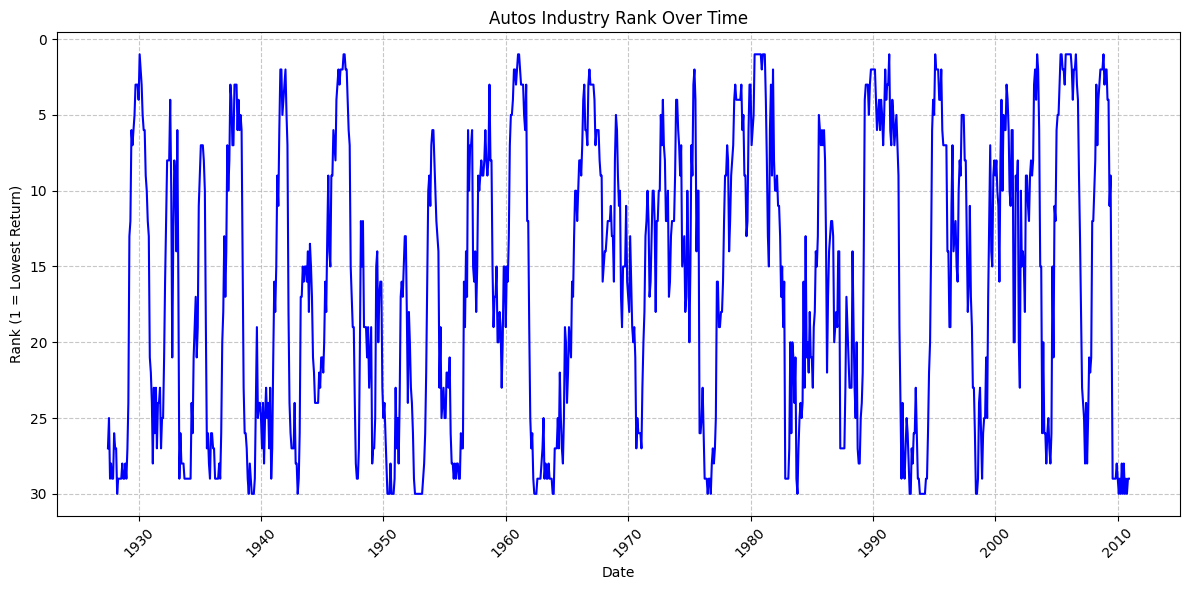

In [ ]:
# Plot Autos industry rank over time
plt.figure(figsize=(12, 6))
plt.plot(ranked_df['mdate'], ranked_df['Autos_12m_avg'], color='blue')

# Customize the plot
plt.title('Autos Industry Rank Over Time')
plt.xlabel('Date')
plt.ylabel('Rank (1 = Lowest Return)')

# Invert y-axis since rank 1 is lowest return
plt.gca().invert_yaxis()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

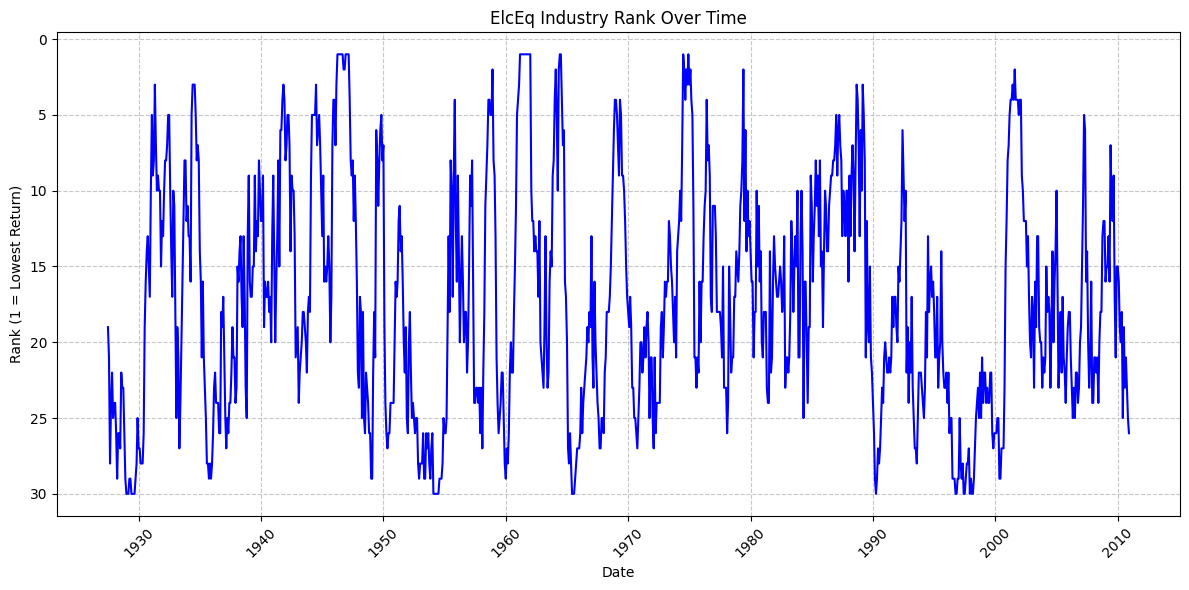

In [ ]:
import matplotlib.pyplot as plt

# Plot Autos industry rank over time
plt.figure(figsize=(12, 6))
plt.plot(ranked_df['mdate'], ranked_df['ElcEq_12m_avg'], color='blue')

# Customize the plot
plt.title('ElcEq Industry Rank Over Time')
plt.xlabel('Date')
plt.ylabel('Rank (1 = Lowest Return)')

# Invert y-axis since rank 1 is lowest return
plt.gca().invert_yaxis()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()